In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [3]:
# Unique vals
DIRECTORY = './data/'
train = pd.read_csv(DIRECTORY + 'train.csv').drop(columns='id')
train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
print("Rows:", len(train))
print("NonDuplicate:", len(train.drop(columns='FloodProbability').drop_duplicates()))

Rows: 1117957
NonDuplicate: 1117957


# PCA
Finding: PCA useless, top components trash

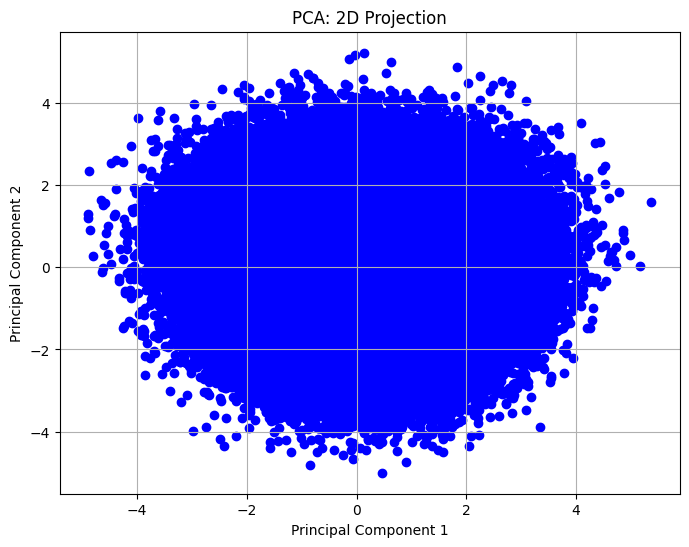

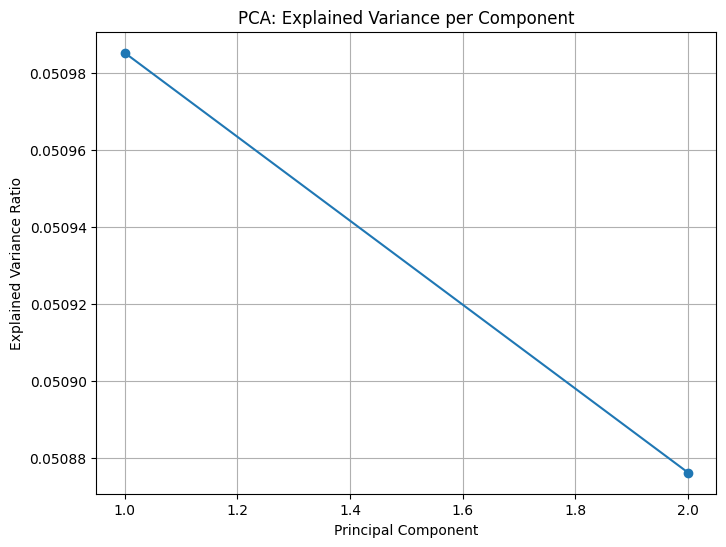

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example data: Replace this with your actual 20-dimensional data
X_train = train.drop(columns='FloodProbability')

# Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train)

# Perform PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Create a 2D scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='b', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection')
plt.grid(True)
plt.show()

# Scree plot (explained variance for each component)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance per Component')
plt.grid(True)
plt.show()


# T-Sne on Subset
T-sne also useless

In [ ]:
# Viz
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Example data: Replace this with your own 20-dimensional dataset
X_train = train.drop(columns='FloodProbability').sample(1000)

# Perform t-SNE to reduce data to 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
reduced_data = tsne.fit_transform(X_train)


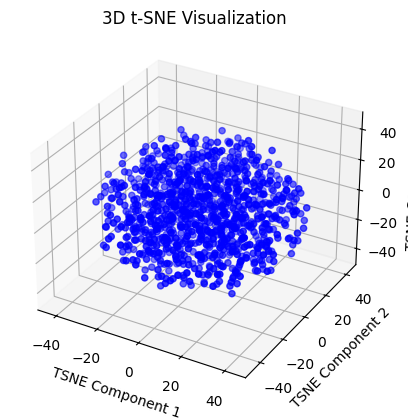

In [6]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the reduced data
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c='b', marker='o')

# Add labels and title
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')
ax.set_title('3D t-SNE Visualization')

# Show the plot
plt.show()

# K-means

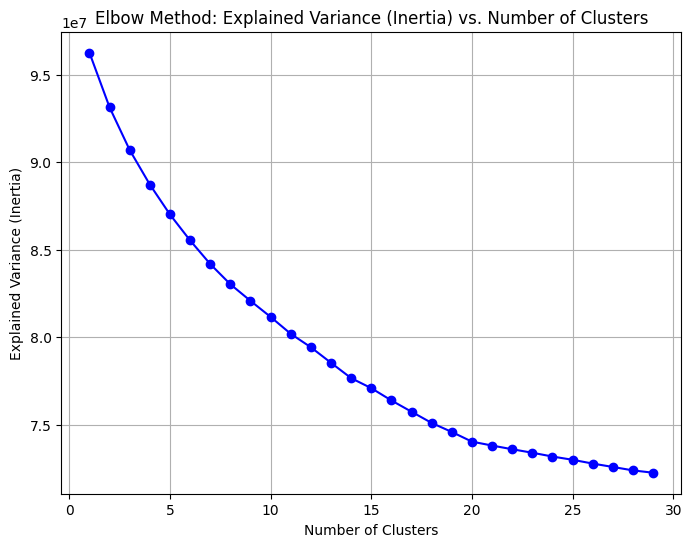

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example data: Replace this with your actual 20-dimensional data
X_train = train.drop(columns='FloodProbability')

# Standardize the data (K-Means is sensitive to scale)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train)

# Elbow method to find the optimal number of clusters
inertia = []  # List to store inertia for each number of clusters

# Test for different cluster numbers (from 1 to 10)
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the explained variance (inertia) for each number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 30), inertia, marker='o', color='b')
plt.title('Elbow Method: Explained Variance (Inertia) vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Explained Variance (Inertia)')
plt.grid(True)
plt.show()

In [13]:
# Try doing k=20, predicting mean of each cluster
k=20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)
clusters = kmeans.predict(X_train)

array([ 6, 14,  9, ..., 15, 19,  2], dtype=int32)

In [17]:
train['cluster'] = clusters
display(train.groupby('cluster')['FloodProbability'].agg(['mean', 'std']))
train['FloodProbability'].agg(['mean', 'std'])

# clusters useless??

,mean,std
cluster,,
0,0.501492,0.051187
1,0.516199,0.053731
2,0.503712,0.051613
3,0.503553,0.051332
4,0.505228,0.049977
5,0.505312,0.051136
6,0.507229,0.050093
7,0.503839,0.050634
8,0.504348,0.050081


mean    0.504480
std     0.051026
Name: FloodProbability, dtype: float64